# Report on S&P 500 Index Historical Data Analysis

#### 1. **Line Plot of Closing Prices**
- **Objective**: To visualize the trend of the S&P 500 closing prices over time.
- **Insight**: The line plot shows the daily closing prices from January 1, 2019, to January 1, 2023. This plot reveals the overall trend and significant fluctuations in the S&P 500 index during this period. Noticeable are the periods of market volatility, including the impact of the COVID-19 pandemic in early 2020, where a sharp decline followed by a robust recovery is observed.

#### 2. **Moving Average of Closing Prices**
- **Objective**: To smooth out short-term fluctuations and highlight longer-term trends in the S&P 500 closing prices.
- **Insight**: The 50-day and 200-day moving averages (MA50 and MA200) provide a clearer picture of the underlying trend. The 50-day moving average is more responsive to recent price changes, while the 200-day moving average shows the broader market trend. Crossovers of these moving averages can signal potential buy or sell opportunities, such as the "golden cross" (MA50 crossing above MA200) and "death cross" (MA50 crossing below MA200).

#### 3. **Daily Returns Histogram**
- **Objective**: To analyze the distribution of daily returns of the S&P 500 index.
- **Insight**: The histogram of daily returns, with a kernel density estimate (KDE) overlay, provides insight into the volatility and risk associated with the S&P 500. Most daily returns cluster around zero, indicating that small daily price changes are most common. However, the distribution also shows the presence of extreme positive and negative returns, reflecting periods of high market volatility.

#### 4. **Heatmap of Correlation Matrix**
- **Objective**: To examine the correlations between different stock price features.
- **Insight**: The heatmap displays the correlation coefficients between high, low, open, close, volume, and adjusted close prices. Strong positive correlations are observed among the high, low, open, close, and adjusted close prices, suggesting that these features move together. The volume shows a weaker correlation with the price features, indicating that trading volume and price movements are not as strongly linked.

#### 5. **Candlestick Chart**
- **Objective**: To provide a detailed visualization of daily price movements, including open, high, low, and close prices.
- **Insight**: The candlestick chart offers a comprehensive view of the market's price action over time, including patterns that may signal future price movements. The chart highlights daily trading ranges and helps identify bullish and bearish trends. The inclusion of volume bars at the bottom adds context to the price movements, showing how trading activity aligns with price changes.

### Conclusion
These visualizations collectively provide a deep understanding of the S&P 500 index's historical performance. By examining trends, moving averages, return distributions, correlations, and detailed daily price movements, one can gain valuable insights into market behavior and potential future price actions. Such analysis is crucial for making informed trading and investment decisions in the stock market.

In [16]:
import yfinance as yf
import datetime

# Define the ticker symbol
ticker = 'AAPL'

# Define the date range
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Fetch the data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)
df.reset_index(inplace=True)

print(df.head())

[*********************100%%**********************]  1 of 1 completed

        Date        Open        High         Low       Close   Adj Close  \
0 2022-01-03  177.830002  182.880005  177.710007  182.009995  179.481125   
1 2022-01-04  182.630005  182.940002  179.119995  179.699997  177.203232   
2 2022-01-05  179.610001  180.169998  174.639999  174.919998  172.489655   
3 2022-01-06  172.699997  175.300003  171.639999  172.000000  169.610199   
4 2022-01-07  172.889999  174.139999  171.029999  172.169998  169.777863   

      Volume  
0  104487900  
1   99310400  
2   94537600  
3   96904000  
4   86709100  


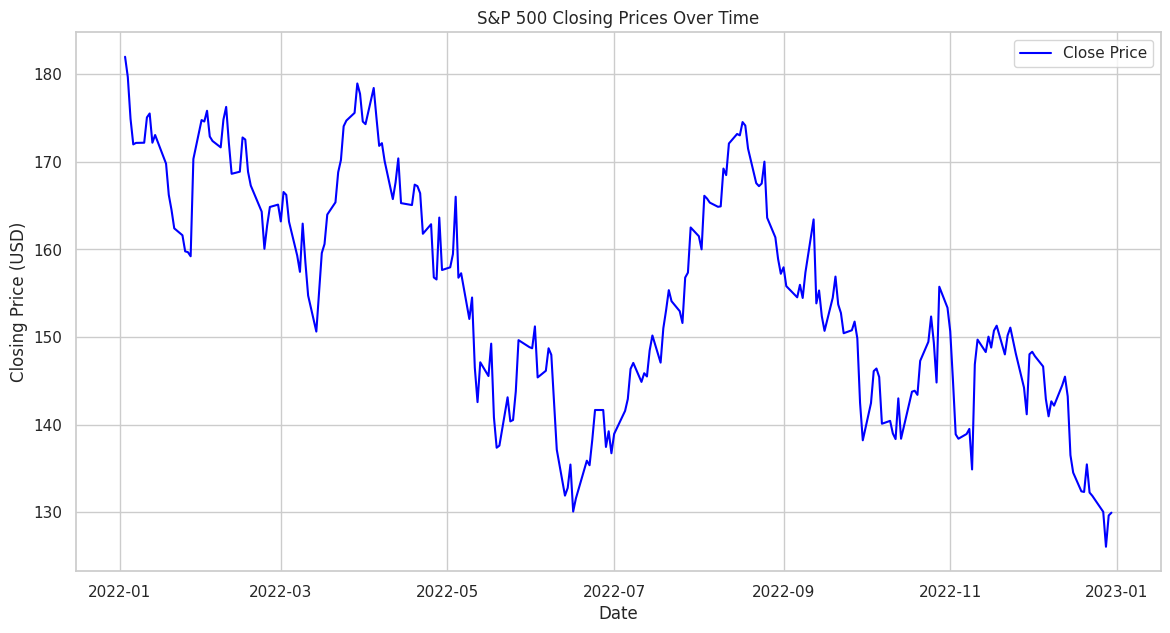

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

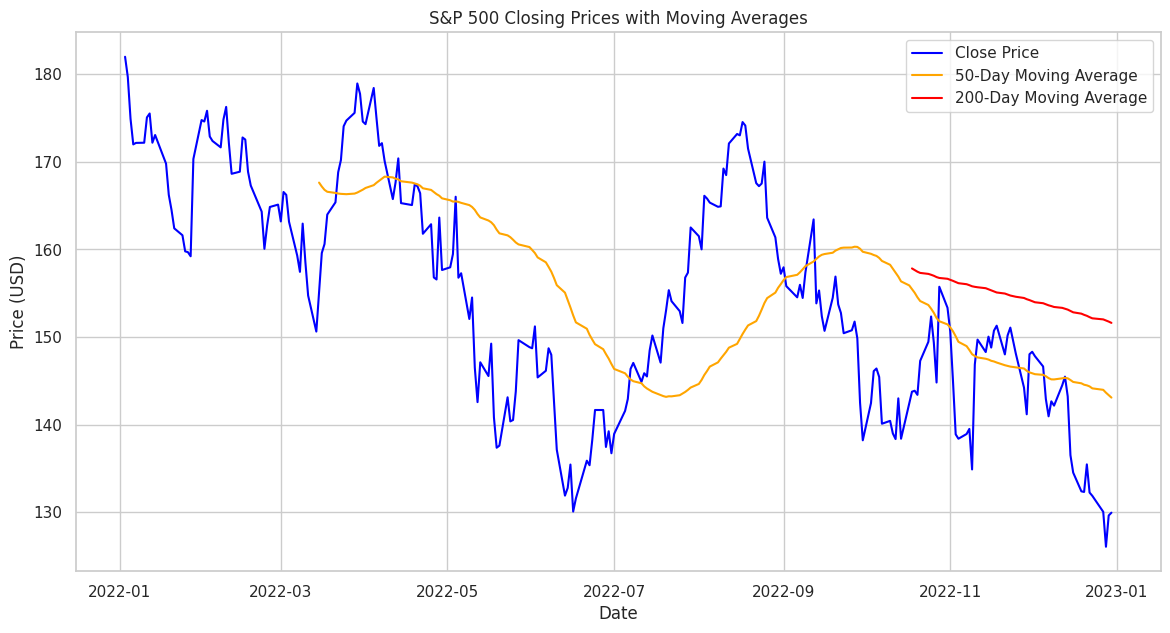

In [10]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day Moving Average', color='red')
plt.title('S&P 500 Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

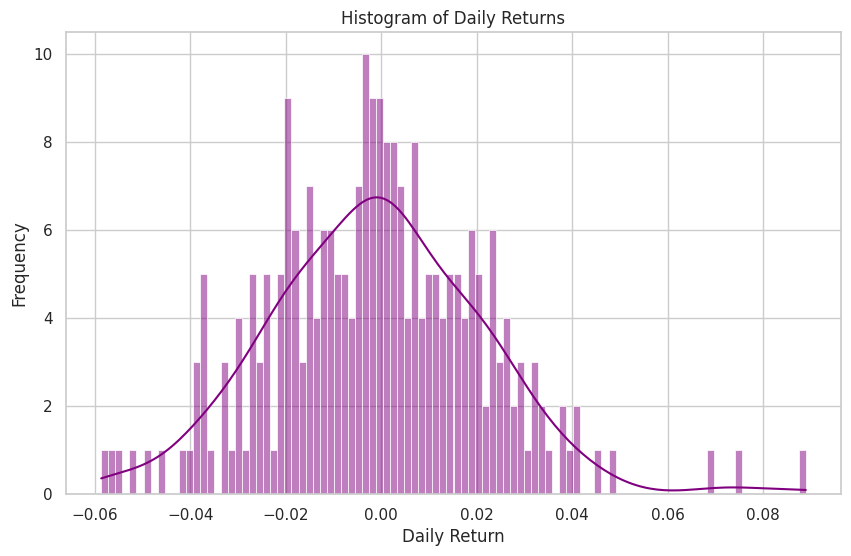

In [12]:
import warnings
warnings.filterwarnings('ignore')

df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

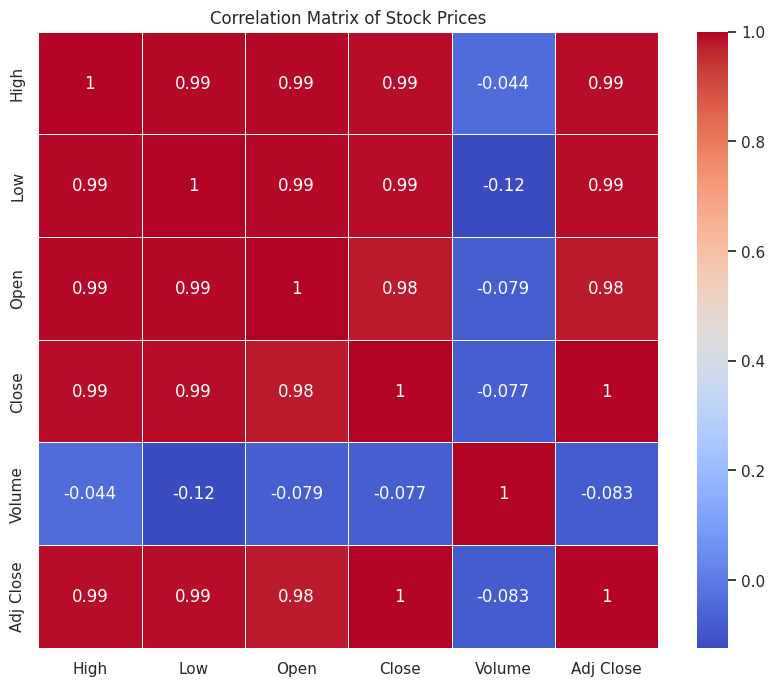

In [13]:
corr_matrix = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Prices')
plt.show()

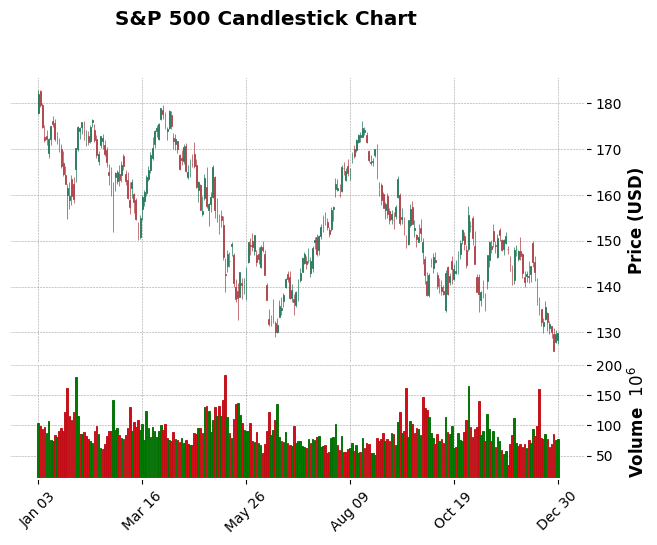

In [15]:
import mplfinance as mpf

df.set_index('Date', inplace=True)

mpf.plot(df, type='candle', style='charles', title='S&P 500 Candlestick Chart',
         ylabel='Price (USD)', volume=True)